# Predict house price In this practice

I want to predict house prices. The dataset source is [Kaggle](https://www.kaggle.com/). I use regression in this exercise.

**My goal** here is to **work with data and touch those**, **not** a good prediction and score!

## I do it in ?? steps:

1. Importing required libraries
2. Read data
3. Data preprocessing
    1. Data Exploration
    2. Data cleaning
4. Visualization
5.
6.

### step 1: Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### step 2: Read data 

* `df = pd.read_csv("housePrice.csv")` read data from a `.csv` file.

* `print(df.shape)` I'll discuss this as soon.

* `pd.set_option('display.max_rows', df.shape[0]+1)` I wanted to see an overview of the data, but with the **increasing experience**, I can see a number of data with `head()` instead of displaying the whole data.

In [2]:
df = pd.read_csv("housePrice.csv")
print(df.shape)
#pd.set_option('display.max_rows', df.shape[0]+1)
df.head()
df

(3479, 8)


Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1     True       True      True             Shahran   
1      60     1     True       True      True             Shahran   
2      79     2     True       True      True              Pardis   
3      95     2     True       True      True       Shahrake Qods   
4     123     2     True       True      True      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2     True       True      True  Southern Janatabad   
3475   83     2     True       True      True            Niavaran   
3476   75     2    False      False     False              Parand   
3477  105     2     True       True      True              Dorous   
3478   82     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3     9.025000e+08    30083.33  
4     7.000000e+09   233333.33  
...            ...         ...  
3474  3.500000e+09   116666.67  
3475  6.800000e+09   226666.67  
3476  3.650000e+08    12166.67  
3477  5.600000e+09   186666.67  
3478  3.600000e+08    12000.00  

[3479 rows x 8 columns]

### step 3: Data preprocessing
#### 3.1: Data Exploration

* `print(df.isnull().sum())` for find the missing value. I have 23 missing values in the "Address" column. (***1***)
* `df.describe(include="all")` summarize the data, according to the below results, there was a problem in the "Area" column.

In [3]:
print(df.isnull().sum())
df.describe(include="all")

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


Area         Room Parking Warehouse Elevator Address         Price  \
count   3479  3479.000000    3479      3479     3479    3456  3.479000e+03   
unique   243          NaN       2         2        2     192           NaN   
top       75          NaN    True      True     True   Punak           NaN   
freq     111          NaN    2950      3182     2739     161           NaN   
mean     NaN     2.079908     NaN       NaN      NaN     NaN  5.359023e+09   
std      NaN     0.758275     NaN       NaN      NaN     NaN  8.099935e+09   
min      NaN     0.000000     NaN       NaN      NaN     NaN  3.600000e+06   
25%      NaN     2.000000     NaN       NaN      NaN     NaN  1.418250e+09   
50%      NaN     2.000000     NaN       NaN      NaN     NaN  2.900000e+09   
75%      NaN     2.000000     NaN       NaN      NaN     NaN  6.000000e+09   
max      NaN     5.000000     NaN       NaN      NaN     NaN  9.240000e+10   

          Price(USD)  
count   3.479000e+03  
unique           NaN  
top              NaN  
freq             NaN  
mean    1.786341e+05  
std     2.699978e+05  
min     1.200000e+02  
25%     4.727500e+04  
50%     9.666667e+04  
75%     2.000000e+05  
max     3.080000e+06

> In this block, I want to find rows that have more than one feature with NaN values. **I repeat this point, maybe with the increasing experience don't need to this part.**

In [4]:
for i in range(len(df.index)) :
    if(df.iloc[i].isnull().sum() > 1):
        print(" Total NaN in row", i + 1, ":", df.iloc[i].isnull().sum())
print("Done!")

Done!


#### 3.2: Data cleaning

* ‍‍‍‍‍‍‍‍‍`moddf = df.copy()` make a copy of the original dataframe to prevent running, again and again, the previous block.
* `moddf["Area"] = moddf["Area"].str.replace(",", "")` according to data, there were some records in the "Area" column with comma (,).
* `moddf["Area"] = pd.to_numeric(moddf["Area"])`, `moddf = moddf.sort_values(by=["Area"])` I decided to sort data of the "Area" column and observe outlier data.
* `moddf = moddf[:-4]` deleting 4 end data as the outlier.



In [5]:
moddf = df.copy()
moddf["Area"] = moddf["Area"].str.replace(",", "")
moddf["Area"] = pd.to_numeric(moddf["Area"])
moddf = moddf.sort_values(by=["Area"])
moddf = moddf[:-4]
moddf

Area  Room  Parking  Warehouse  Elevator      Address         Price  \
3211    30     0    False       True     False  Ostad Moein  5.000000e+08   
2321    32     1    False       True     False      Hashemi  6.100000e+08   
2324    32     1    False       True      True    Eskandari  9.400000e+08   
2783    33     1    False       True     False     Beryanak  5.600000e+08   
2307    35     1    False       True     False     Salsabil  6.600000e+08   
...    ...   ...      ...        ...       ...          ...           ...   
573    863     2     True       True      True   Gheitarieh  7.830000e+09   
1974   900     3     True       True     False     Damavand  8.500000e+09   
1694   929     5     True       True     False        Zafar  8.000000e+10   
807   1000     2     True       True     False     Damavand  7.000000e+09   
2171  3600     2    False      False     False     Shahryar  9.720000e+09   

      Price(USD)  
3211    16666.67  
2321    20333.33  
2324    31333.33  
2783    18666.67  
2307    22000.00  
...          ...  
573    261000.00  
1974   283333.33  
1694  2666666.67  
807    233333.33  
2171   324000.00  

[3475 rows x 8 columns]

* `moddf = moddf[~moddf["Address"].isnull()]` according to (1) in data exploration, there are 23 records without "Address", so I have to delete them.

> But about `print(moddf.shape)`, the original dataframe (df) was **(3479, 8)**, in other words, **3479** records, **4** records deleted by outlier and **23** records deleted because have not "Address". Now modified dataframe has **3479-4-23 = 3452** records. ***Note this section help to understand better and isn't nesesery.***

In [6]:
moddf = moddf[~moddf["Address"].isnull()]
print(moddf.shape)

(3452, 8)


* `moddf.describe(include="all")` summarize the data again, according to the below results, problem solved!

In [7]:
moddf.describe(include="all")

Area         Room Parking Warehouse Elevator Address  \
count   3452.000000  3452.000000    3452      3452     3452    3452   
unique          NaN          NaN       2         2        2     192   
top             NaN          NaN    True      True     True   Punak   
freq            NaN          NaN    2925      3158     2717     161   
mean     108.188007     2.081112     NaN       NaN      NaN     NaN   
std       92.734668     0.759998     NaN       NaN      NaN     NaN   
min       30.000000     0.000000     NaN       NaN      NaN     NaN   
25%       69.000000     2.000000     NaN       NaN      NaN     NaN   
50%       90.000000     2.000000     NaN       NaN      NaN     NaN   
75%      120.000000     2.000000     NaN       NaN      NaN     NaN   
max     3600.000000     5.000000     NaN       NaN      NaN     NaN   

               Price    Price(USD)  
count   3.452000e+03  3.452000e+03  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    5.377292e+09  1.792431e+05  
std     8.123946e+09  2.707982e+05  
min     3.600000e+06  1.200000e+02  
25%     1.419750e+09  4.732500e+04  
50%     2.900000e+09  9.666667e+04  
75%     6.000000e+09  2.000000e+05  
max     9.240000e+10  3.080000e+06

### step 4: Visualization

* a basic understanding of the data with the histogram

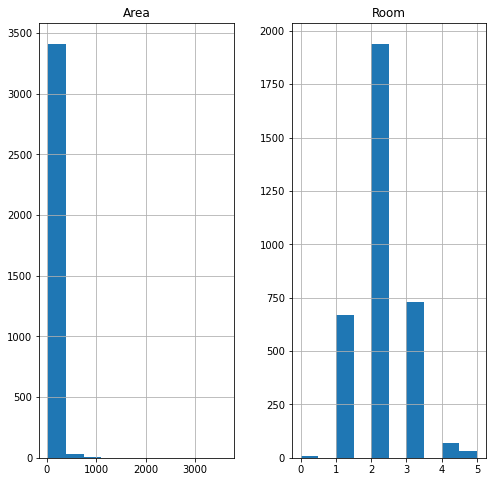

In [8]:
vis = moddf[["Area", "Room", "Parking", "Warehouse", "Elevator"]]
vis.hist(figsize=(8, 8))
plt.show()

<center>
    <img src="https://d9i9nmwzijaw9.cloudfront.net/453/762/493/-229996967-1tkrn6k-32bphlkb13674hf/original/avatar.jpg" width="300" alt="cognitiveclass.ai logo"  />
</center>